In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

In [6]:
input_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/Catalogs/F555W.lnk'
data = pd.read_csv(input_file, header=None, delim_whitespace=True, usecols=[2, 3, 4, 5, 6, 15], names=['dx', 'dy', 'x', 'y', 'F814W', 'F555W'])
data['dx'] = pd.to_numeric(data['dx'], errors='coerce')
data['dy'] = pd.to_numeric(data['dy'], errors='coerce')
data = data.dropna()

data = data[data['F555W'] < -5]


/var/folders/nx/ljvhqy816sn3y2d3hzwxcqhc0000gn/T/ipykernel_4266/3292646351.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file, header=None, delim_whitespace=True, usecols=[2, 3, 4, 5, 6, 15], names=['dx', 'dy', 'x', 'y', 'F814W', 'F555W'])


In [7]:
# add a column with the dr=sqrt(dx**2+dy**2)
data['dr'] = (data['dx']**2 + data['dy']**2)**0.5
# select only the lines with dr<0.5
data = data[data['dr'] < 0.5]

In [8]:
print(data)

            dx      dy        x        y   F814W    F555W        dr
0      -0.0062  0.0348  5894.85  1143.01 -10.457 -10.1313  0.035348
1      -0.1718 -0.1423  5787.07  1148.84  -7.412  -5.5141  0.223080
2       0.0458  0.0361  5823.93  1157.60  -8.794  -8.1857  0.058317
3       0.0159  0.0483  5832.33  1157.62  -9.674  -9.2376  0.050850
8       0.0711  0.1294  5678.37  1164.50  -7.632  -6.2844  0.147647
...        ...     ...      ...      ...     ...      ...       ...
248123  0.0061 -0.0319  8905.37  8929.01 -10.120  -9.7397  0.032478
248124  0.1297  0.0349  8825.94  8930.33  -7.115  -6.0388  0.134313
248126  0.0092 -0.0596  8816.49  8931.44  -8.155  -7.3086  0.060306
248128 -0.0106  0.2543  8995.33  8931.32  -7.360  -6.4984  0.254521
248129  0.0429 -0.0319  9016.47  8935.28  -9.973  -9.4902  0.053460

[92252 rows x 7 columns]


In [9]:
# center and approximative radius of the young cluster (NGC 362)
center_NGC362 = np.array([4850,4920])
radius_NGC362 = 750

# center and approximative radius of the young cluster
center_B90 = np.array([5000, 7000])
radius_B90 = 1000

In [10]:
data['distance_NGC362'] = np.sqrt((data['x'] - center_NGC362[0]) ** 2 + (data['y'] - center_NGC362[1]) ** 2)
data['distance_B90'] = np.sqrt((data['x'] - center_B90[0]) ** 2 + (data['y'] - center_B90[1]) ** 2)

data_NGC362_cluster = data[data['distance_NGC362'] < radius_NGC362]
data_B90_cluster = data[data['distance_B90'] < radius_B90]

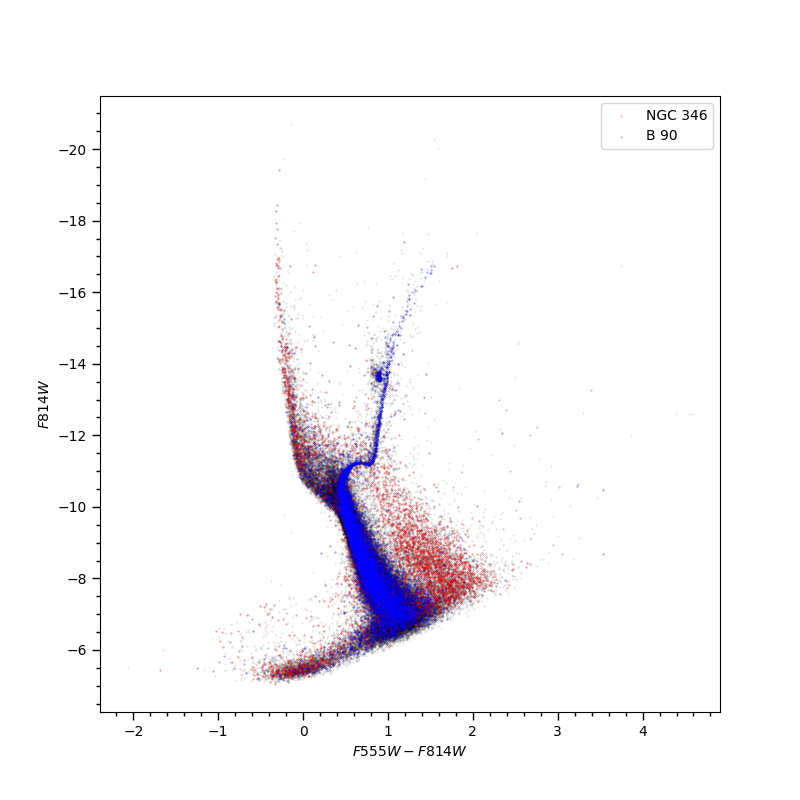

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(data['F555W']-data['F814W'], data['F814W'], s=0.1, alpha=0.2, c='black')
plt.scatter(data_NGC362_cluster['F555W']-data_NGC362_cluster['F814W'], data_NGC362_cluster['F814W'], s=0.1, alpha=0.5, c='red', label=r'NGC 346')
plt.scatter(data_B90_cluster['F555W']-data_B90_cluster['F814W'], data_B90_cluster['F814W'], s=0.1, alpha=0.5, c='blue', label=r'B 90')
plt.gca().invert_yaxis()

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.xlabel(r'$F555W-F814W$')
plt.ylabel(r'$F814W$')
plt.legend()
plt.show()

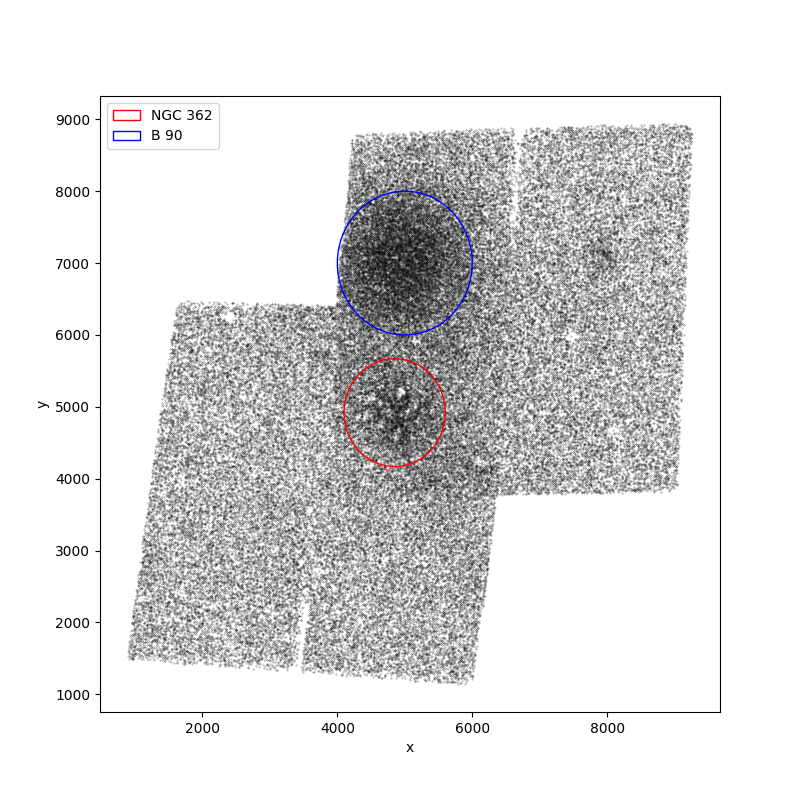

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(data['x'], data['y'], s=0.1, alpha=0.5, c='black')
circle_NGC362 = plt.Circle(center_NGC362, radius_NGC362, color='red', fill=False, linestyle='-', linewidth=1, label=r'NGC 362')
ax.add_patch(circle_NGC362)
circle_B90 = plt.Circle(center_B90, radius_B90, color='blue', fill=False, linestyle='-', linewidth=1, label=r'B 90')
ax.add_patch(circle_B90)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()